In [7]:
import pandas as pd
import numpy as np
df = pd.read_csv('2015.csv')
df

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,Switzerland,Western Europe,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,Iceland,Western Europe,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,Denmark,Western Europe,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,Norway,Western Europe,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,Canada,North America,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176
...,...,...,...,...,...,...,...,...,...,...,...,...
153,Rwanda,Sub-Saharan Africa,154,3.465,0.03464,0.22208,0.77370,0.42864,0.59201,0.55191,0.22628,0.67042
154,Benin,Sub-Saharan Africa,155,3.340,0.03656,0.28665,0.35386,0.31910,0.48450,0.08010,0.18260,1.63328
155,Syria,Middle East and Northern Africa,156,3.006,0.05015,0.66320,0.47489,0.72193,0.15684,0.18906,0.47179,0.32858
156,Burundi,Sub-Saharan Africa,157,2.905,0.08658,0.01530,0.41587,0.22396,0.11850,0.10062,0.19727,1.83302


In [8]:
df.dtypes

Country                           object
Region                            object
Happiness Rank                     int64
Happiness Score                  float64
Standard Error                   float64
Economy (GDP per Capita)         float64
Family                           float64
Health (Life Expectancy)         float64
Freedom                          float64
Trust (Government Corruption)    float64
Generosity                       float64
Dystopia Residual                float64
dtype: object

In [12]:
df.shape

(158, 12)

In [13]:
num_df = df._get_numeric_data()
num_df.shape

(158, 10)

## a. (5 poin) Standardisasi seluruh data numerik

In [15]:
from sklearn.preprocessing import StandardScaler
std = StandardScaler()
# transform data
standared = std.fit_transform(num_df)
standared


array([[-1.72099989,  1.93736005, -0.80592569, ...,  2.30965159,
         0.47103971,  0.75825809],
       [-1.69907456,  1.91458063,  0.05588945, ..., -0.01647953,
         1.57585637,  1.09285682],
       [-1.67714922,  1.88479215, -0.8544869 , ...,  2.8427738 ,
         0.8242928 ,  0.71233526],
       ...,
       [ 1.67742676, -2.0761992 ,  0.13253425, ...,  0.38141902,
         1.85689094, -3.20843049],
       [ 1.69935209, -2.1646885 ,  2.26396166, ..., -0.35771452,
        -0.31694987, -0.48198451],
       [ 1.72127743, -2.22251319,  1.13418227, ..., -0.30180313,
        -0.5581534 , -0.96361241]])

## b. (10 poin) Gunakan metode Principal Component Analysis (PCA) untuk menemukan representasi 2 dimensi utama dari seluruh data numerik (yang terstandardisasi) lalu hitung variance explained ratio dari 2 komponen ini.

In [17]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(standared)
x_new = p
principalDf = pd.DataFrame(data = principalComponents
             , columns = ['principal component 1', 'principal component 2'])
principalDf

,principal component 1,principal component 2
0,-4.347938,0.747925
1,-3.782221,-0.158027
2,-4.272779,1.183663
3,-4.145043,0.760878
4,-3.963281,1.124229
...,...,...
153,1.868314,4.094329
154,3.470820,1.183217
155,3.133285,3.091280
156,4.981786,-0.386936


In [22]:
evr = pca.fit(standared)
print(evr.explained_variance_ratio_)
print(evr.explained_variance_ratio_.sum())

[0.47063954 0.14860412]
0.6192436556679477


## c. (10 poin) Buatlah biplot dengan memproyeksikan data dan fitur numerik (yang terstandarisasi) menuju principal component diatas. Gunakan warna yang berbeda untuk region yang berbeda.

In [42]:
finalDf = pd.concat([principalDf, df[['Region']]], axis = 1)

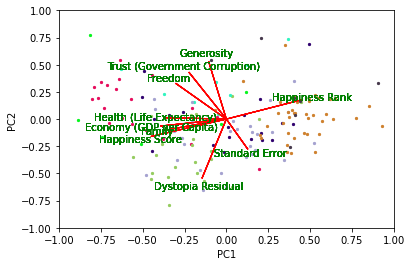

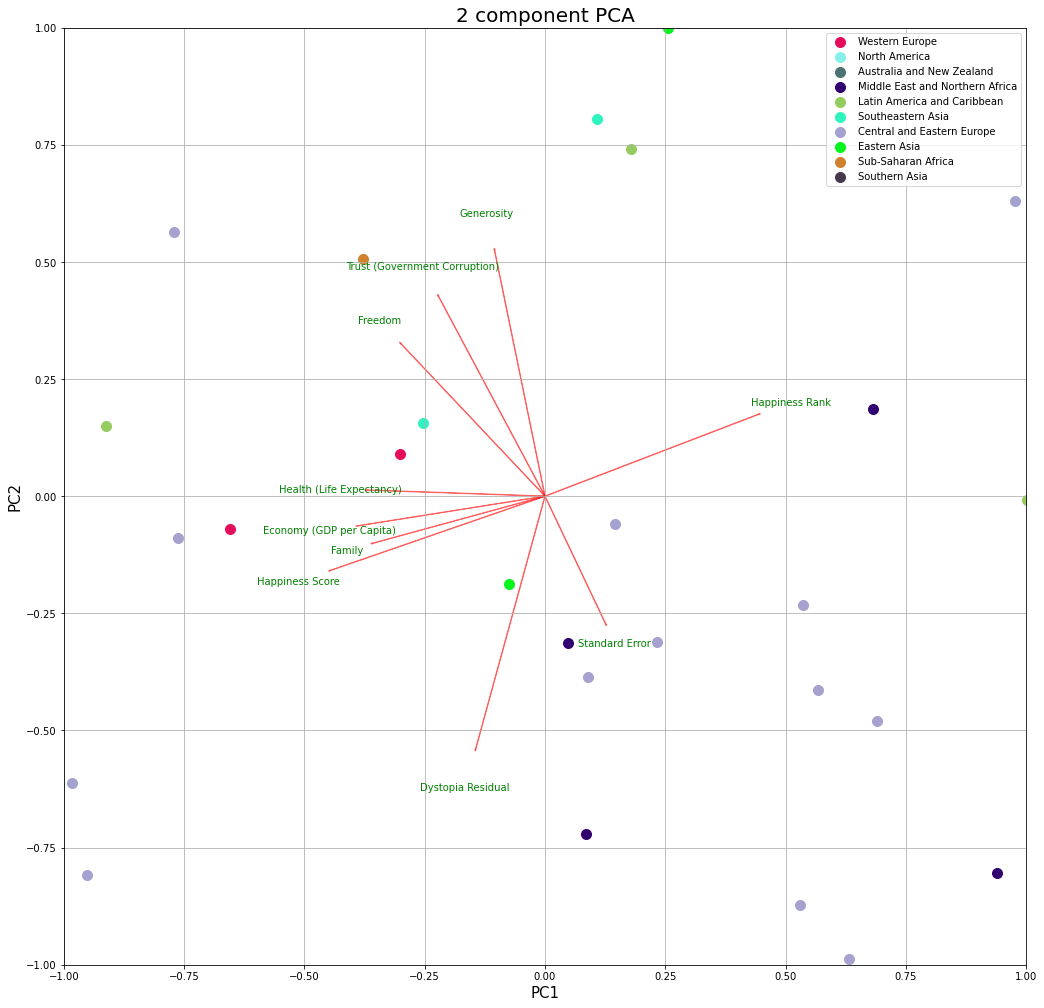

In [67]:
import matplotlib.pyplot as plt
import random
number_of_colors = len(df['Region'].unique())

colors = ["#"+''.join([random.choice('0123456789ABCDEF') for j in range(6)])
             for i in range(number_of_colors)]

def myplot(score,coeff,labels=None):
    targets = df['Region'].unique()
    for target,color in zip(targets,colors):
        indicesToKeep = finalDf['Region'] == target
        xs = finalDf.loc[indicesToKeep, 'principal component 1']
        ys = finalDf.loc[indicesToKeep, 'principal component 2']
        n = coeff.shape[0]
        labels = num_df.columns
        scalex = 1.0/(xs.max() - xs.min())
        scaley = 1.0/(ys.max() - ys.min())
        plt.scatter(xs * scalex,ys * scaley, s=5, c = color)
        for i in range(n):
            plt.arrow(0, 0, coeff[i,0], coeff[i,1],color = 'r',alpha = 0.5)
            if labels is None:
                plt.text(coeff[i,0]* 1.15, coeff[i,1] * 1.15, "Var"+str(i+1), color = 'g', ha = 'center', va = 'center')
            else:
                plt.text(coeff[i,0]* 1.15, coeff[i,1] * 1.15, labels[i], color = 'g', ha = 'center', va = 'center')
        plt.xlim(-1,1)
        plt.ylim(-1,1)
        plt.xlabel("PC{}".format(1))
        plt.ylabel("PC{}".format(2))
        plt.grid()
    
    n = coeff.shape[0]
    labels = num_df.columns
    targets = df['Region'].unique()
    fig = plt.figure(figsize = (100,100))
    ax = fig.add_subplot(5,5,5) 
    ax.set_xlabel('Principal Component 1', fontsize = 15)
    ax.set_ylabel('Principal Component 2', fontsize = 15)
    ax.set_title('2 component PCA', fontsize = 20)
    for target,color in zip(targets,colors):
        indicesToKeep = finalDf['Region'] == target
        ax.scatter(finalDf.loc[indicesToKeep, 'principal component 1']
                   , finalDf.loc[indicesToKeep, 'principal component 2']
                   , c = color
                   , s = 100)
    ax.legend(targets)
    for i in range(n):
        plt.arrow(0, 0, coeff[i,0], coeff[i,1],color = 'r',alpha = 0.5)
        if labels is None:
            plt.text(coeff[i,0]* 1.15, coeff[i,1] * 1.15, "Var"+str(i+1), color = 'g', ha = 'center', va = 'center')
        else:
            plt.text(coeff[i,0]* 1.15, coeff[i,1] * 1.15, labels[i], color = 'g', ha = 'center', va = 'center')
    plt.xlim(-1,1)
    plt.ylim(-1,1)
    plt.xlabel("PC{}".format(1))
    plt.ylabel("PC{}".format(2))
    plt.grid()

#Call the function. Use only the 2 PCs.
myplot(principalComponents,np.transpose(pca.components_))
plt.show()

## d. (5 poin) Analisa loading dan score pada biplot tersebut.

Terdapat beberapa poin menarik dari biplot ini. pertama dapat kita lihat bahwa happiness score dan happiness rank malah tidak berkorelasi. Sehingga dapat dilihat bahwa banyak penduduk sub-saharan Africa memiliki happiness rank yang cenderung dekat padahal berdasarkan happiness score, economy, health, family, negara ini sangat kurang. Sedangkan negara-negara di eropa memiliki kebahagiaan yang lebih baik dan lebih mempercayai pemerintahannya dan kebebasan.

## e. (10 poin) Gunakan metode Linear Discriminant Analysis (LDA) untuk menemukan representasi 2 dimensi utama dari seluruh data numerik (yang terstandardisasi) lalu bandingkan dengan hasil proyeksi data PCA dari region yang berbeda.

In [76]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
lda = LinearDiscriminantAnalysis(n_components = 2)
# prepare transform on dataset
lda.fit(standared,df['Region'])
# apply transform to dataset
transformed = lda.transform(standared)
transformed

array([[-2.91459689,  0.99963537],
       [-3.3003135 ,  0.98162496],
       [-2.36258494,  1.47946234],
       [-2.66918548,  1.65207164],
       [-2.85970813,  1.99458261],
       [-2.40358727,  0.51948596],
       [-2.85445332,  2.56441483],
       [-2.62945447,  1.49032884],
       [-2.7146416 ,  2.17869944],
       [-2.94524834,  1.75686307],
       [-3.00712009,  0.42765792],
       [-2.21729211, -0.7313763 ],
       [-2.71948468,  0.83457853],
       [-1.84062523, -0.40912623],
       [-2.75560189,  1.83634413],
       [-0.87627577, -1.37279726],
       [-2.8513803 ,  1.25357107],
       [-2.77856719,  1.86410812],
       [-2.62138106,  0.12030362],
       [-1.93442875,  1.35741515],
       [-2.91468238,  2.88019137],
       [-1.45381276,  0.28038822],
       [-1.01396059, -2.47261272],
       [-3.39912495,  1.39554321],
       [-1.81826341, -0.43877296],
       [-2.64925178,  1.06604861],
       [-2.25865458, -0.3305194 ],
       [-1.77980113,  1.79126775],
       [-2.76912199,

In [78]:
print(lda.explained_variance_ratio_)
print(lda.explained_variance_ratio_.sum())

[0.68780412 0.12695123]
0.8147553455812091


In [79]:
myplot(transformed,np.transpose(lda.components_))
plt.show()

AttributeError: 'LinearDiscriminantAnalysis' object has no attribute 'components_'